In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import seaborn as sns
from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
import keras
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3, MobileNetV2, DenseNet121
from tensorflow.keras.layers import Activation, Dropout,Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Lambda, Input, AveragePooling2D
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential, Model
from keras.layers import Dropout, MaxPooling2D, Dense, Conv2D, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50V2
from keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings("ignore")
from keras.models import Model
from keras.layers import Flatten,Dense
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plot
from glob import glob

import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import seaborn as sns
from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential, Model
from keras.utils import to_categorical
from keras.layers import Dropout, MaxPooling2D, Dense, Conv2D, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50V2
from tqdm import tqdm
from keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, LearningRateScheduler
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, LearningRateScheduler
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from sklearn.utils import shuffle

In [3]:
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.layers import Flatten,Dense
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plot
from glob import glob
image_size=[224,224]
def load_data():

    datasets = ["/kaggle/input/chest-xray-pneumonia/chest_xray/train", "/kaggle/input/chest-xray-pneumonia/chest_xray/test"]
    images = []
    labels = []

    count =0
    for dataset in datasets:

        for folder in os.listdir(dataset):

            if folder in ['NORMAL']: label = 0
            elif folder in ['PNEUMONIA']: label = 1

            for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                img_path = os.path.join(os.path.join(dataset, folder), file)

                image = cv2.imread(img_path)


                try:
                    image = cv2.resize(image, image_size, interpolation=cv2.INTER_AREA)
                except:
                    continue
                images.append(image)
                labels.append(label)
            print()

    images = np.array(images, dtype = 'float32')
    labels = np.array(labels, dtype = 'int32')

    return images, labels


In [4]:
images, labels = load_data()

100%|██████████| 3875/3875 [01:40<00:00, 38.43it/s]


100%|██████████| 1341/1341 [01:08<00:00, 19.54it/s]


100%|██████████| 390/390 [00:08<00:00, 43.72it/s]


100%|██████████| 234/234 [00:10<00:00, 22.10it/s]


In [8]:
from sklearn.model_selection import train_test_split
images, labels = shuffle(images, labels, random_state=10)

# Split the data into training (65%) and test (35%)
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.35, random_state=42)

# Further split the training set into training (55%) and validation (10%)
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.10, random_state=42)


In [9]:
print("Number of data points in the entire dataset:", len(images))
print("Number of data points in the training set:", len(train_images))
print("Number of data points in the validation set:", len(val_images))
print("Number of data points in the test set:", len(test_images))

Number of data points in the entire dataset: 5840
Number of data points in the training set: 3416
Number of data points in the validation set: 380
Number of data points in the test set: 2044


In [10]:
train_images = train_images / 255.0
val_images = val_images / 255.0
test_images = test_images / 255.0

resnet50-model-2

# resnet 50....model2

In [11]:
resnet50 = ResNet50V2(weights = "imagenet", input_shape = (224,224,3), include_top = False)
model2 = Sequential()
model2.add(resnet50)
for layer in resnet50.layers:
    layer.trainable = False

model2.add(Flatten())
model2.add(Dense(units = 128, activation = "relu", kernel_regularizer=l2(0.01)))
model2.add(BatchNormalization())
model2.add(Activation("relu"))
model2.add(Dropout(0.5))
model2.add(Dense(units = 1, activation = "sigmoid"))
optimizer = Adam(learning_rate=0.0001)
model2.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])


datagen2 = ImageDataGenerator(shear_range=0.2,zoom_range=0.2,horizontal_flip=True
)
train_images, train_labels = shuffle(train_images, train_labels, random_state=42)

batch_size = 16
epochs = 5

train_data_generator2 = datagen2.flow(train_images, train_labels, batch_size=batch_size)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


# Lists to store training and test metrics
train_loss_history = []
train_acc_history = []
test_loss_history = []
test_acc_history = []

for epoch in range(epochs):
    history2 = model2.fit_generator(
        train_data_generator2,
        epochs=5,  
        validation_data=(test_images, test_labels),
        callbacks=[early_stopping]
    )
    
    # Evaluate on the test set
    test_loss, test_accuracy = model2.evaluate(test_images, test_labels)
    
    # Append metrics to the history lists
    train_loss_history.append(history2.history['loss'][0])
    train_acc_history.append(history2.history['accuracy'][0])
    test_loss_history.append(test_loss)
    test_acc_history.append(test_accuracy)

    print(f"Epoch {epoch + 1}/{epochs} - "
          f"Train Loss: {history2.history['loss'][0]}, "
          f"Train Accuracy: {history2.history['accuracy'][0]}, "
          f"Test Loss: {test_loss}, "
          f"Test Accuracy: {test_accuracy}")
    
model2.save('resnet-50-model2.h5')


94668760/94668760 [==============================] - 0s 0us/step
Epoch 1/5
214/214 [==============================] - 54s 213ms/step - loss: 1.2620 - accuracy: 0.9078 - val_loss: 0.8292 - val_accuracy: 0.9491
Epoch 2/5
214/214 [==============================] - 39s 182ms/step - loss: 0.7559 - accuracy: 0.9397 - val_loss: 0.6353 - val_accuracy: 0.9530
Epoch 3/5
214/214 [==============================] - 39s 184ms/step - loss: 0.5930 - accuracy: 0.9453 - val_loss: 0.5242 - val_accuracy: 0.9584
Epoch 4/5
214/214 [==============================] - 40s 185ms/step - loss: 0.5087 - accuracy: 0.9476 - val_loss: 0.4598 - val_accuracy: 0.9511
Epoch 5/5
64/64 [==============================] - 6s 90ms/step - loss: 0.4107 - accuracy: 0.9516
Epoch 1/5 - Train Loss: 1.262031078338623, Train Accuracy: 0.9077869057655334, Test Loss: 0.41067731380462646, Test Accuracy: 0.9515655636787415
Epoch 1/5
214/214 [==============================] - 42s 198ms/step - loss: 0.4057 - accuracy: 0.9505 - val_loss: 0.

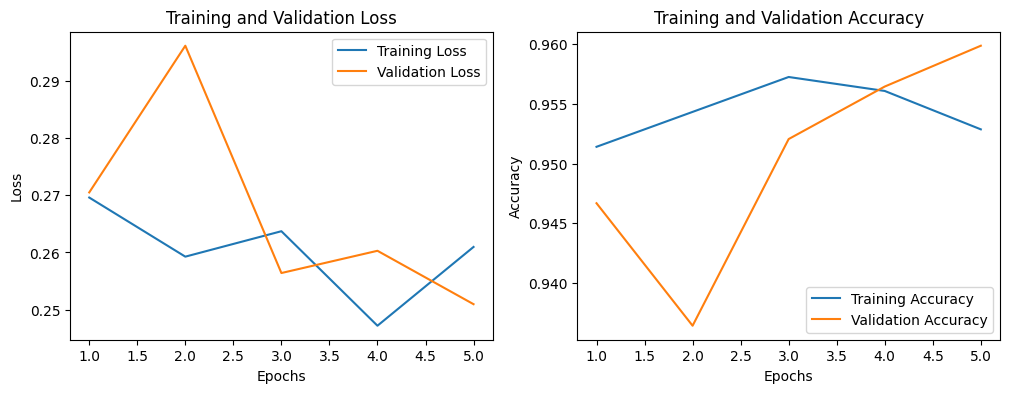

In [12]:
training_loss = history2.history['loss']
validation_loss = history2.history['val_loss']
training_accuracy = history2.history['accuracy']
validation_accuracy = history2.history['val_accuracy']


epochs_range = range(1, len(training_loss) + 1)

# Plotting Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

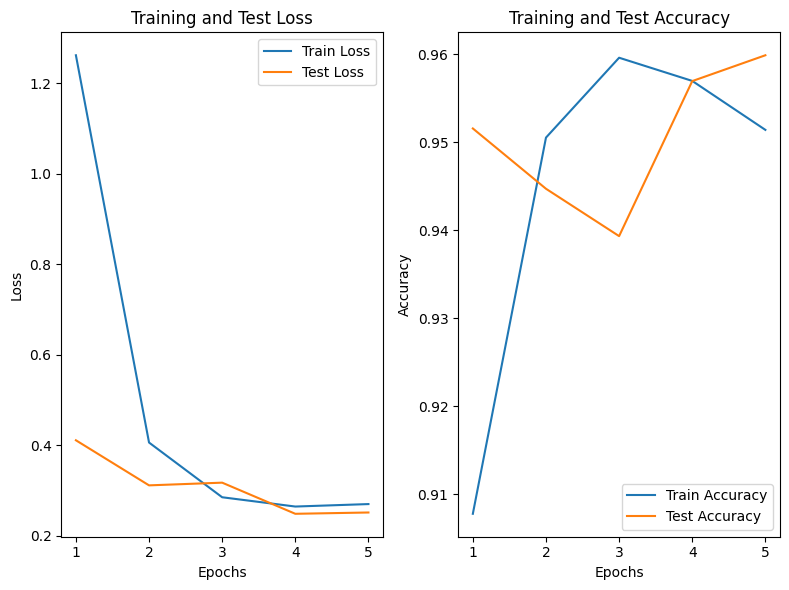

In [13]:
# Plotting
epochs_range = range(1, epochs + 1)

# Plot training and test loss
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss_history, label='Train Loss')
plt.plot(epochs_range, test_loss_history, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()

# Plot training and test accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_acc_history, label='Train Accuracy')
plt.plot(epochs_range, test_acc_history, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

64/64 [==============================] - 6s 88ms/step


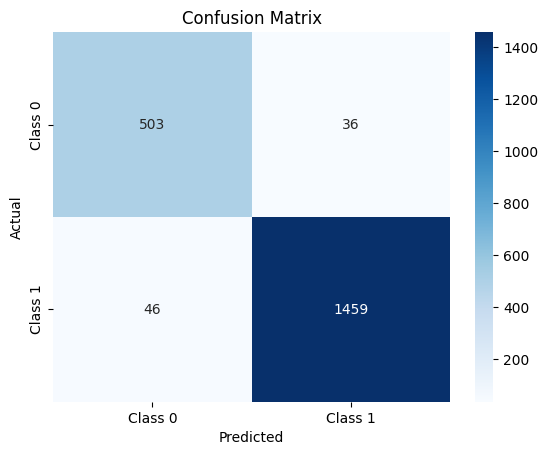

In [14]:
test_predictions = model2.predict(test_images)
binary_predictions = (test_predictions > 0.5).astype(int)
conf_matrix = confusion_matrix(test_labels, binary_predictions)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [15]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

test_predictions2 = model2.predict(test_images)

# Convert predictions to binary labels (0 or 1)
test_predictions_binary2= (test_predictions2 > 0.5).astype(int)

#  F1 score ,recall,precision for test set
f1_test = f1_score(test_labels, test_predictions_binary2)
precision = precision_score(test_labels, test_predictions_binary2)
recall = recall_score(test_labels, test_predictions_binary2)
accuracy = accuracy_score(test_labels, test_predictions_binary2)

print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score for Test Set: {f1_test:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

64/64 [==============================] - 6s 88ms/step
Accuracy: 0.9599
F1 Score for Test Set: 0.9727
Precision: 0.9759
Recall: 0.9694


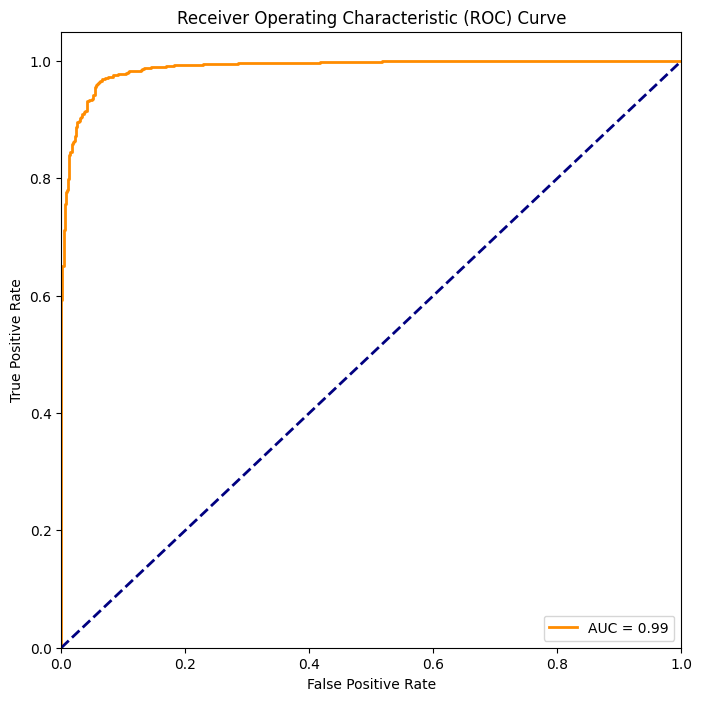

In [16]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(test_labels, test_predictions2)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
